In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression 

In [3]:
claimants=pd.read_csv("E:\\notebooks file\\claimants.csv")

In [4]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [6]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [7]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [8]:
claimants=claimants.dropna()

In [9]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1096 non-null   int64  
 1   CLMSEX    1096 non-null   float64
 2   CLMINSUR  1096 non-null   float64
 3   SEATBELT  1096 non-null   float64
 4   CLMAGE    1096 non-null   float64
 5   LOSS      1096 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.9 KB


In [10]:
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [12]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [13]:
Y_pred=classifier.predict(X)

In [14]:
Y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [15]:
Y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})

In [16]:
Y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix=confusion_matrix(Y,Y_pred)

In [19]:
print(confusion_matrix)

[[381 197]
 [123 395]]


In [21]:
((381+395)/(381+197+123+395)*100)

70.8029197080292

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
fpr,tpr,thresolds=roc_curve(Y,Y_pred)

In [26]:
auc=roc_auc_score(Y,Y_pred)

Text(0, 0.5, 'True positive rate')

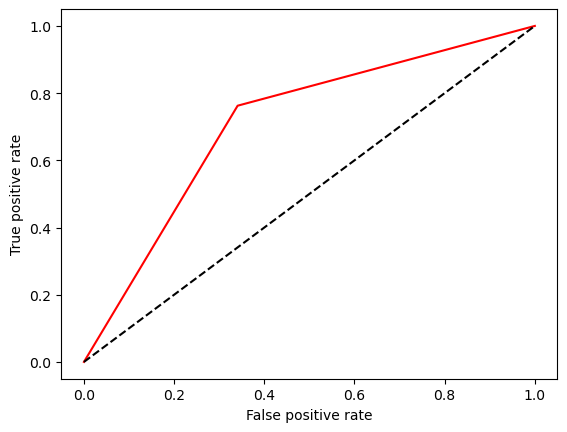

In [27]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')